# Importing necessary libraires

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

**Reading IRIS Dataset**

In [3]:
data = pd.read_csv("Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### **By above analysis -**

**1) No any null values present in dataset.**<br>
**2) Total count of rows is 150.**<br>
**3) Mean of features are -** <br>
    &nbsp;&nbsp;&nbsp;&nbsp;**i) SepalLengthCm - 5.82**<br>
    &nbsp;&nbsp;&nbsp;&nbsp;**ii) SepalWidthCm - 3.05**<br>
    &nbsp;&nbsp;&nbsp;&nbsp;**iii) PetalLengthCm - 3.75**<br>
    &nbsp;&nbsp;&nbsp;&nbsp;**iv) PetalWidthCm - 1.19**<br>
    
**4) Standard Deviation of features are-** <br>
    &nbsp;&nbsp;&nbsp;&nbsp;**i) SepalLengthCm - 0.82**<br>
    &nbsp;&nbsp;&nbsp;&nbsp;**ii) SepalWidthCm - 0.43**<br>
    &nbsp;&nbsp;&nbsp;&nbsp;**iii) PetalLengthCm - 1.76**<br>
    &nbsp;&nbsp;&nbsp;&nbsp;**iv) PetalWidthCm - 0.76**<br>

In [8]:
data.drop("Id",axis=1,inplace=True)

### **Visualizing data -**

<Figure size 1000x500 with 0 Axes>

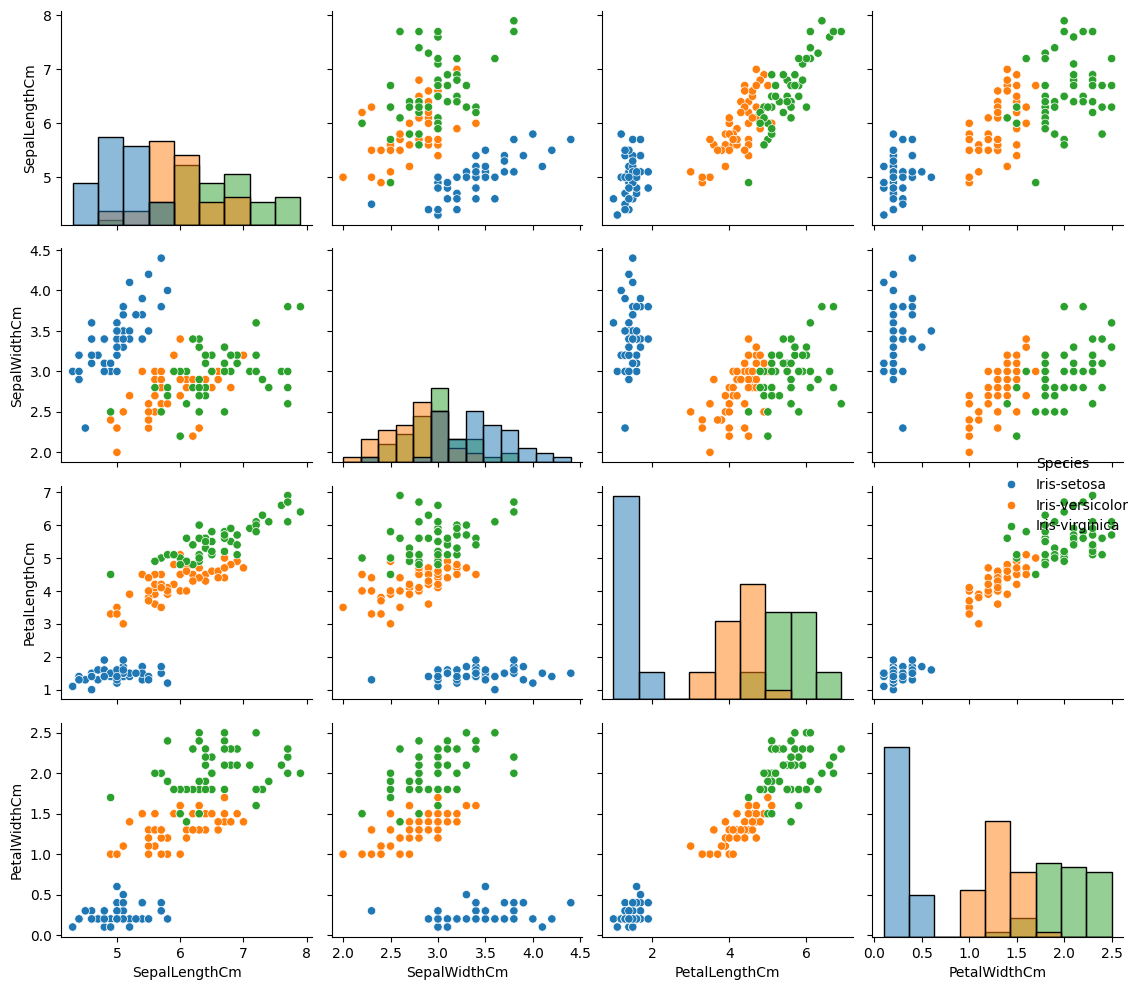

In [9]:
plt.figure(figsize=(10,5))
sns.pairplot(data,diag_kind="hist",hue="Species")
plt.tight_layout()

### **Observations -**
**1) Sepal Length vs. Sepal Width:** <br>

&nbsp;&nbsp;&nbsp;&nbsp;i) Iris-setosa (blue): Clear separation from the other two species. Setosa has generally lower sepal length and higher sepal width.<br>
&nbsp;&nbsp;&nbsp;&nbsp;ii) Iris-versicolor (orange) & Iris-virginica (green): Overlap significantly, but Iris-virginica tends to have longer sepals.<br>

**2) Sepal Length vs. Petal Length:** <br>

&nbsp;&nbsp;&nbsp;&nbsp;i) Iris-setosa: Distinctly separated with lower petal length.<br>
&nbsp;&nbsp;&nbsp;&nbsp;ii) Iris-versicolor: Intermediate petal length.<br>
&nbsp;&nbsp;&nbsp;&nbsp;iii) Iris-virginica: Higher petal length, clear separation from Setosa but overlaps with Versicolor.<br>

**3) Sepal Length vs. Petal Width:**<br>

&nbsp;&nbsp;&nbsp;&nbsp;i) Iris-setosa: Lower petal width.<br>
&nbsp;&nbsp;&nbsp;&nbsp;ii) Iris-versicolor: Intermediate petal width.<br>
&nbsp;&nbsp;&nbsp;&nbsp;iii) Iris-virginica: Higher petal width, overlaps with Versicolor but distinct from Setosa.<br>

**4) Sepal Width vs. Petal Length:**<br>

&nbsp;&nbsp;&nbsp;&nbsp;i) Iris-setosa: Higher sepal width, lower petal length.<br>
&nbsp;&nbsp;&nbsp;&nbsp;ii) Iris-versicolor: Intermediate values.<br>
&nbsp;&nbsp;&nbsp;&nbsp;iii) Iris-virginica: Higher petal length, overlaps with Versicolor.<br>

**5) Sepal Width vs. Petal Width:**<br>

&nbsp;&nbsp;&nbsp;&nbsp;i) Iris-setosa: Higher sepal width, lower petal width.<br>
&nbsp;&nbsp;&nbsp;&nbsp;ii) Iris-versicolor & Iris-virginica: Overlap significantly, but Virginica has higher petal width.<br>

**6) Petal Length vs. Petal Width:**<br>

&nbsp;&nbsp;&nbsp;&nbsp;i)Iris-setosa: Lower petal length and width.<br>
&nbsp;&nbsp;&nbsp;&nbsp;ii)Iris-versicolor: Intermediate values.<br>
&nbsp;&nbsp;&nbsp;&nbsp;iii)Iris-virginica: Higher petal length and width, distinct separation from Setosa, some overlap with Versicolor.

### **Creating new features -**

In [10]:
data["petal_length_width_ratio"] = data["PetalLengthCm"] / data["PetalWidthCm"]
data["sepal_length_widht_ratio"] = data["SepalLengthCm"] / data["SepalWidthCm"]

Text(0.5, 1.0, 'Histogram of Petal Length to Width Ratio by Species')

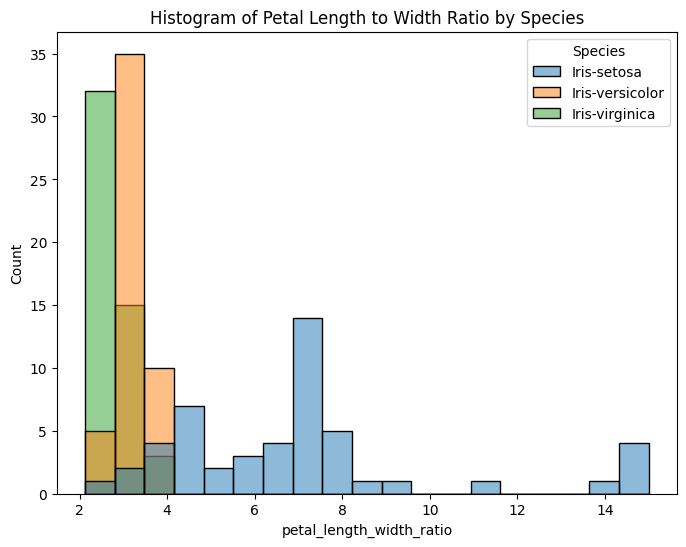

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data, x='petal_length_width_ratio', hue='Species')
plt.title("Histogram of Petal Length to Width Ratio by Species")

### **Observations -**
**Iris-setosa -** The petal length to width ratio is mostly between 2 and 4, with the majority of the data points around 2.<br>

**Iris-versicolor -** The ratio primarily falls between 2 and 4, but the distribution is more spread out compared to Iris-setosa.<br>

**Iris-virginica -** The distribution is more spread out than the other species, with ratios ranging from 2 to around 14. However, most of the ratios are between 4 and 8.
There is a clear separation in the ratio ranges between Iris-virginica and the other two species, suggesting that this ratio can be a distinguishing feature.

### **Outlier Detection -**

In [12]:
data["PetalLengthCm_zscore"] = zscore(data["PetalLengthCm"])
data["PetalWidthCm_zscore"] = zscore(data["PetalWidthCm"])
data["SepalLengthCm_zscore"] = zscore(data["SepalLengthCm"])
data["SepalWidthCm_zscore"] = zscore(data["SepalWidthCm"])

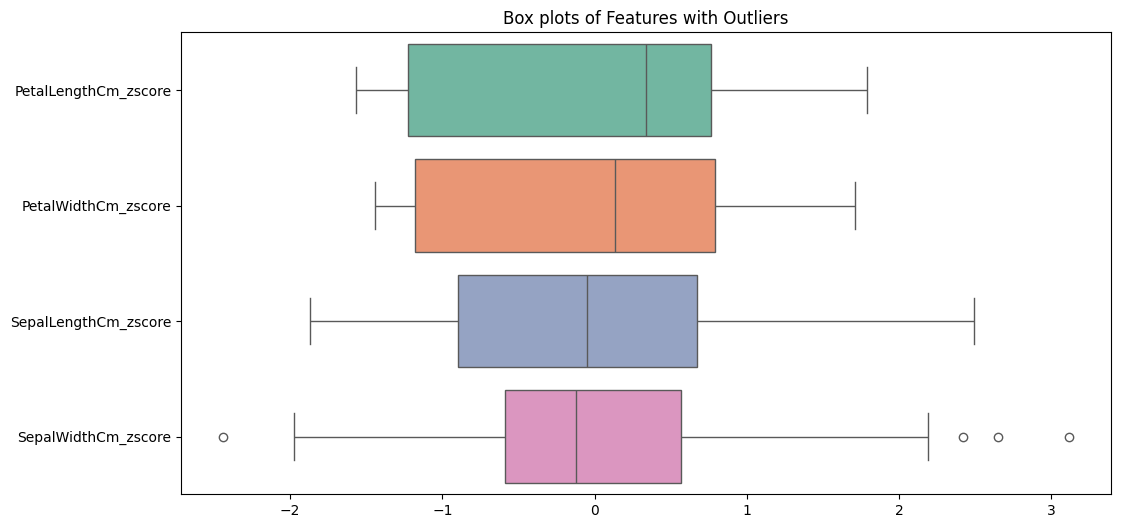

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PetalLengthCm_zscore', 'PetalWidthCm_zscore', 'SepalLengthCm_zscore', 'SepalWidthCm_zscore']], orient="h", palette="Set2")
plt.title("Box plots of Features with Outliers")
plt.show()

### **Observations -**

**1) Petal Length (PetalLengthCm_zscore) -**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Distribution: Symmetric around the mean with no significant outliers.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Range: Approximately from -1.5 to 1.5.<br>

**2) Petal Width (PetalWidthCm_zscore):**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Distribution: Slightly skewed to the right.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Range: Approximately from -1 to 1.5.<br>

**3) Sepal Length (SepalLengthCm_zscore**):<br>
&nbsp;&nbsp;&nbsp;&nbsp;Distribution: Symmetric around the mean with no significant outliers.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Range: Approximately from -1.5 to 1.5.<br>

**4) Sepal Width (SepalWidthCm_zscore):**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Distribution: Symmetric around the mean.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Outliers: There are a few significant outliers on the higher end (above 2 standard deviations from the mean).<br>
&nbsp;&nbsp;&nbsp;&nbsp;Range: Approximately from -2 to 2<br>

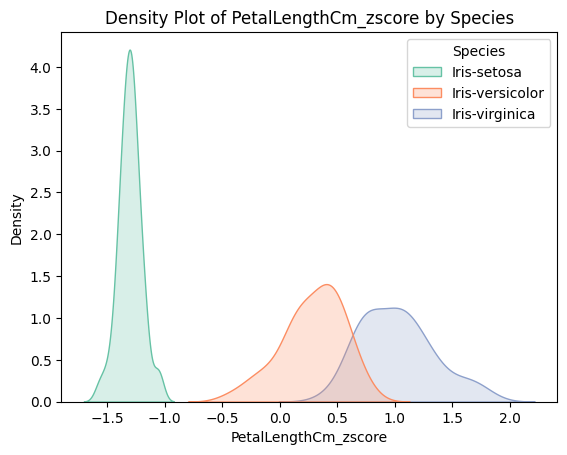

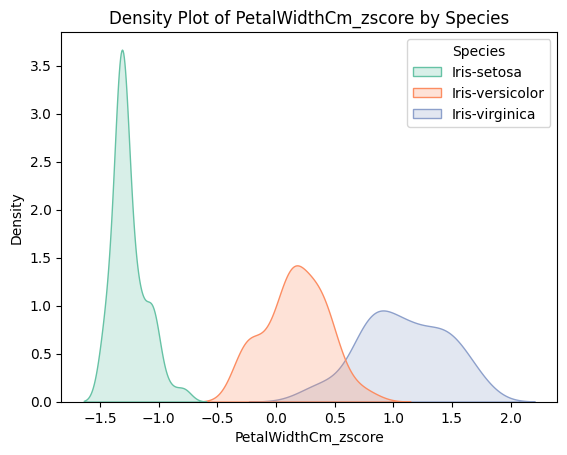

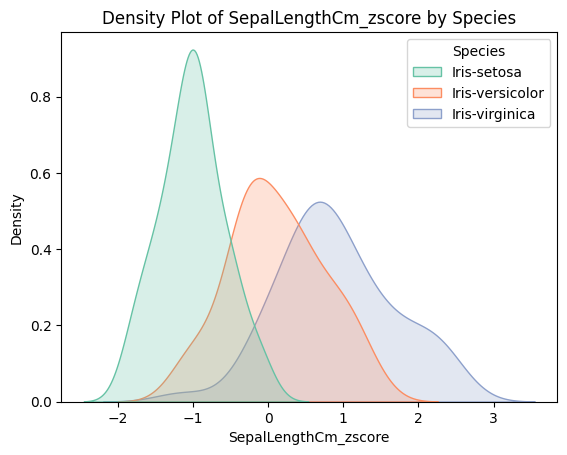

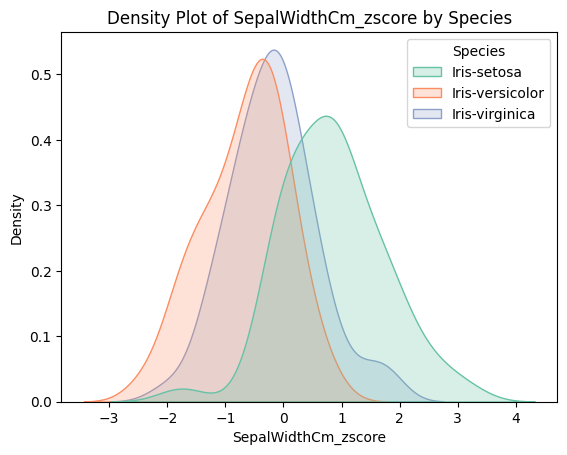

In [14]:
for feature in ['PetalLengthCm_zscore', 'PetalWidthCm_zscore', 'SepalLengthCm_zscore', 'SepalWidthCm_zscore']:
    sns.kdeplot(data=data, x=feature, hue='Species', fill=True, common_norm=False, palette="Set2")
    plt.title(f"Density Plot of {feature} by Species")
    plt.show()

### **Dimensionality Reduction with PCA -**

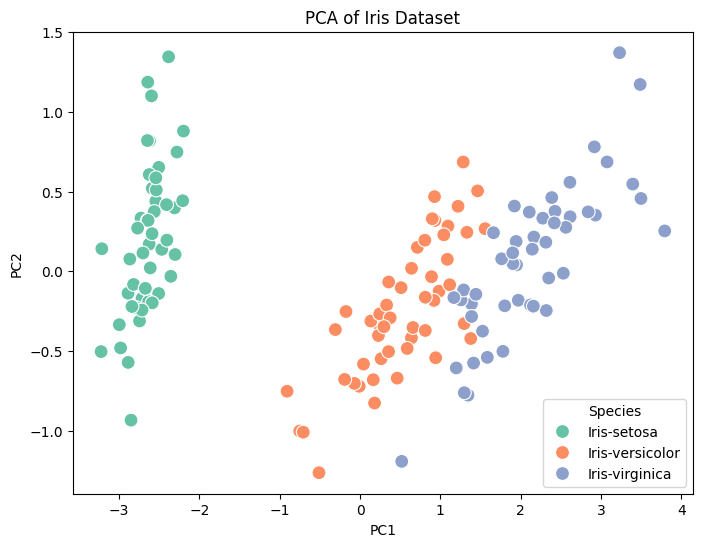

In [15]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(data[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm']])

iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
iris_pca_df['Species'] = data['Species']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_pca_df, x='PC1', y='PC2', hue='Species', palette="Set2", s=100)
plt.title("PCA of Iris Dataset")
plt.show()

### **Observations -**
**Iris-setosa -** Completely separated from the other two species, clustered around the left side of the plot (negative PC1 values).

**Iris-versicolor -** Overlaps partially with Iris-virginica but is generally clustered in the center-right region of the plot.

**Iris-virginica -** Mainly found on the right side, with positive PC1 values. Some overlap with Iris-versicolor.

### **Clustering with K-means -**

Text(0.5, 1.0, 'K-means Clustering of Iris Dataset')

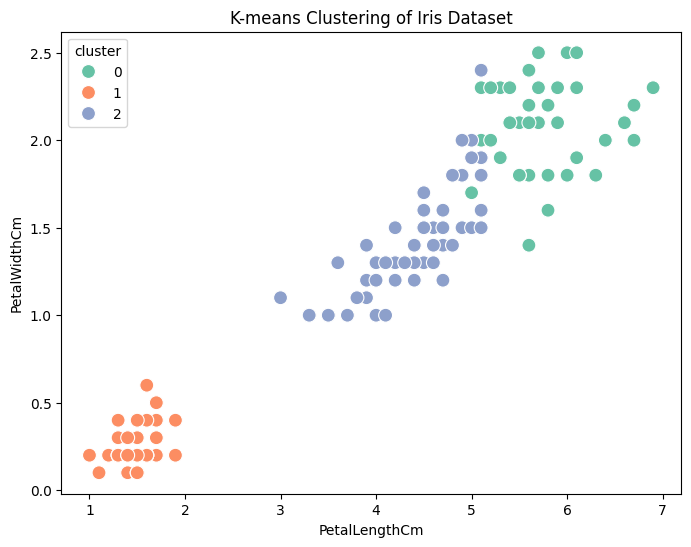

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='cluster', palette="Set2", s=100)
plt.title("K-means Clustering of Iris Dataset")

### **Observations -**
**Cluster 1 (orange) -** Primarily represents Iris-setosa, as it forms a distinct, tightly clustered group at the bottom-left of the plot with low petal length and width.

**Cluster 0 (green) -** Likely corresponds to Iris-versicolor, as it forms a distinct group in the middle with moderate petal length and width.

**Cluster 2 (blue) -** Mostly represents Iris-virginica, with higher petal length and width values.

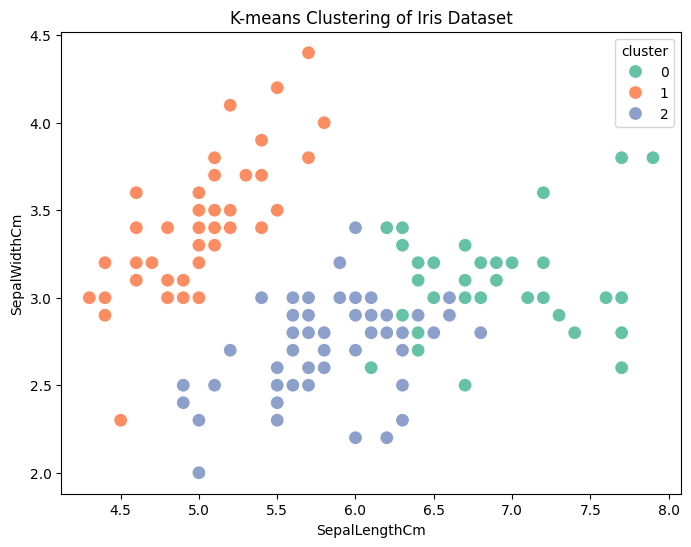

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='cluster', palette="Set2", s=100)
plt.title("K-means Clustering of Iris Dataset")
plt.show()

### **Observations -**
**Cluster 1 (orange) -** Primarily represents Iris-setosa, as it forms a distinct, tightly clustered group at the upper-left of the plot with low sepal length and width.

**Cluster 0 (green) -** Likely corresponds to Iris-versicolor, as it forms a distinct group in the middle with moderate sepal length and width.

**Cluster 2 (blue) -** Mostly represents Iris-virginica, with higher sepal length and width values.

# Importing necesssary MACHINE LEARNING libraires - 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### **Train Test Split Data -**

In [19]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'petal_length_width_ratio', 'sepal_length_widht_ratio',
       'PetalLengthCm_zscore', 'PetalWidthCm_zscore', 'SepalLengthCm_zscore',
       'SepalWidthCm_zscore', 'cluster'],
      dtype='object')

In [20]:
X = data.iloc[:,:4]
y = data.iloc[:,4]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Standardize the features -**

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Logistic Regression -**

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 100.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



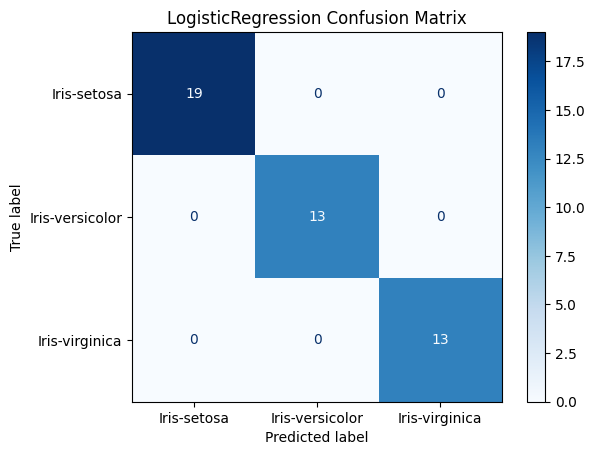

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title('LogisticRegression Confusion Matrix')
plt.show()

## **K-Nearest Neighbors (KNN) -**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

KNN Accuracy: 100.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



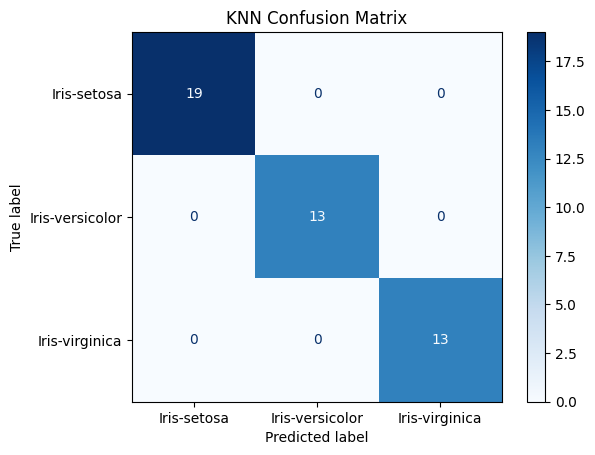

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()

## **Support Vector Machine (SVM) -**


In [28]:
from sklearn.svm import SVC

# Train the model
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", (accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

SVM Accuracy: 97.77777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



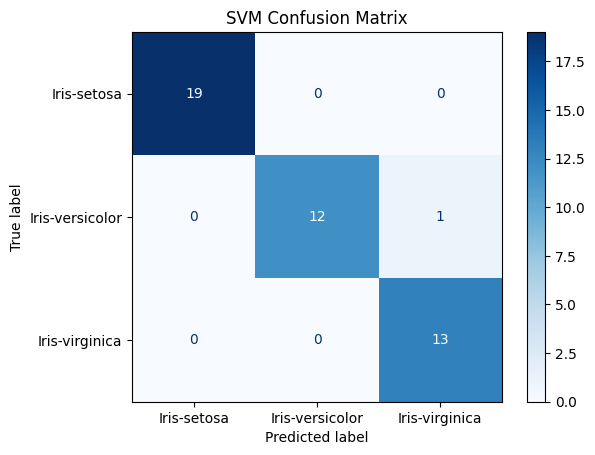

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

## **Random Forest -**

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 100.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



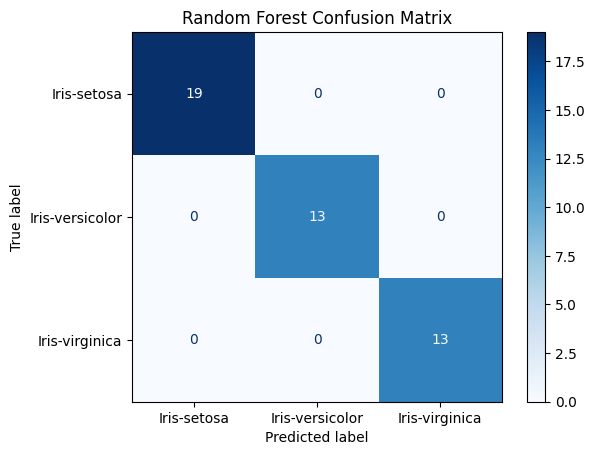

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [32]:
import joblib
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']